### Carrega as bibliotecas

In [67]:
library("daltoolbox")
library("ggplot2")
library("dplyr")
library("reshape")
library("RColorBrewer")
library("corrplot")
library("WVPlots")
library("GGally")
library("aplpack")
library("dplyr")
library("gridExtra")

### Carrega o Dataset

In [20]:
load('/home/data/flight/bfd.RData')

In [21]:
head(data)

,flight_id,airline_icao,airline_name,linetype_code,origin_icao,origin_name,origin_country,expected_depart_date,expected_depart_hour,real_depart_date,⋯,arrival_cloudiness,arrival_ceiling,arrival_wind_speed,ds_arrival_wind_speed,arrival_wind_direction,ds_arrival_wind_direction,ds_arrival_day_period,situation_type,justification_code,justification_description
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<dbl>,<dbl>,<ord>,<dbl>,<fct>,<ord>,<fct>,<fct>,<fct>
1,0057,AEA,nm_aerodromo_destino,I,LEMD,nm_aerodromo_origem,nm_aerodromo_destino,20180808,18,20170808,⋯,NA,NA,6,Light Breeze,NA,Not Informed,Early Morning,REALIZADO,RA,nm_aerodromo_destino
2,2243,AUT,nm_aerodromo_destino,I,SBGR,nm_aerodromo_origem,nm_aerodromo_destino,20180101,00,20180101,⋯,NA,NA,6,Light Breeze,NA,Not Informed,Night,CANCELADO,XN,nm_aerodromo_destino
3,921,TPU,nm_aerodromo_destino,I,SPJC,nm_aerodromo_origem,nm_aerodromo_destino,20180101,00,20180101,⋯,FEW,4000,5,Light Breeze,330,NNW,Early Morning,REALIZADO,N/A,nm_aerodromo_destino
4,16,THY,nm_aerodromo_destino,I,SAEZ,nm_aerodromo_origem,nm_aerodromo_destino,20180101,00,20180101,⋯,FEW,2000,7,Gentle Breeze,320,NW,Night,REALIZADO,N/A,nm_aerodromo_destino
5,917,TPU,nm_aerodromo_destino,I,SPJC,nm_aerodromo_origem,nm_aerodromo_destino,20180101,00,20180101,⋯,FEW,2000,7,Gentle Breeze,320,NW,Early Morning,REALIZADO,N/A,nm_aerodromo_destino
6,8717,AZU,nm_aerodromo_destino,I,KMCO,nm_aerodromo_origem,nm_aerodromo_destino,20180101,00,20180101,⋯,FEW,1100,8,Gentle Breeze,20,NNE,Mid Morning,REALIZADO,AT,nm_aerodromo_destino


### Realiza a investigação preliminar dos atributos do dataset

In [22]:
for (atributo in colnames(data))
{
    print(atributo)
    print(summary(data [,atributo]))
    
}

[1] "flight_id"
   2268    2317    2316    2265    0248    5317    0015    5316    4187    4186 
   1205    1138    1056    1036     977     898     882     826     815     814 
   2934    0773    0247    0016    5026    5027    2479    6327    2852    4234 
    808     784     771     754     720     711     706     704     689     683 
   6224    0774    0506    2883    4048    2956    6363    4231    6326    3524 
    679     670     663     660     643     642     635     634     623     617 
   6312    6362    6310    2604    5749    6175    6225    0261    6987    4118 
    611     610     609     605     601     600     597     595     592     591 
   1727    1300    1303    2949    6174    5265    2656    4167    0058    1302 
    587     586     583     581     580     572     569     569     567     567 
   1726    6313    1301    5213    2478    1240    1679    4494    5217    0507 
    567     566     560     559     558     555     555     555     555     550 
   5044    1

### Descarta as colunas sem preenchimento e o ID

In [23]:
data <- select(data, -'flight_id',  -'airline_name', -'origin_name', -'destination_name', -'origin_country', -'destination_country', -'justification_description')

### Analisa os potenciais atributos preditores

#### Configura as cores e a fonte

In [60]:
#display.brewer.all() --Mostra todas as paletas de cores

In [58]:
colors <- brewer.pal(8, 'Dark2')
font <- theme(text = element_text(size=16))

#### Histograma

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Warning message:
“Removed 85438 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 85677 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 316371 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 316749 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 100507 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 100755 rows containing non-finite values (`stat_bin()`).”


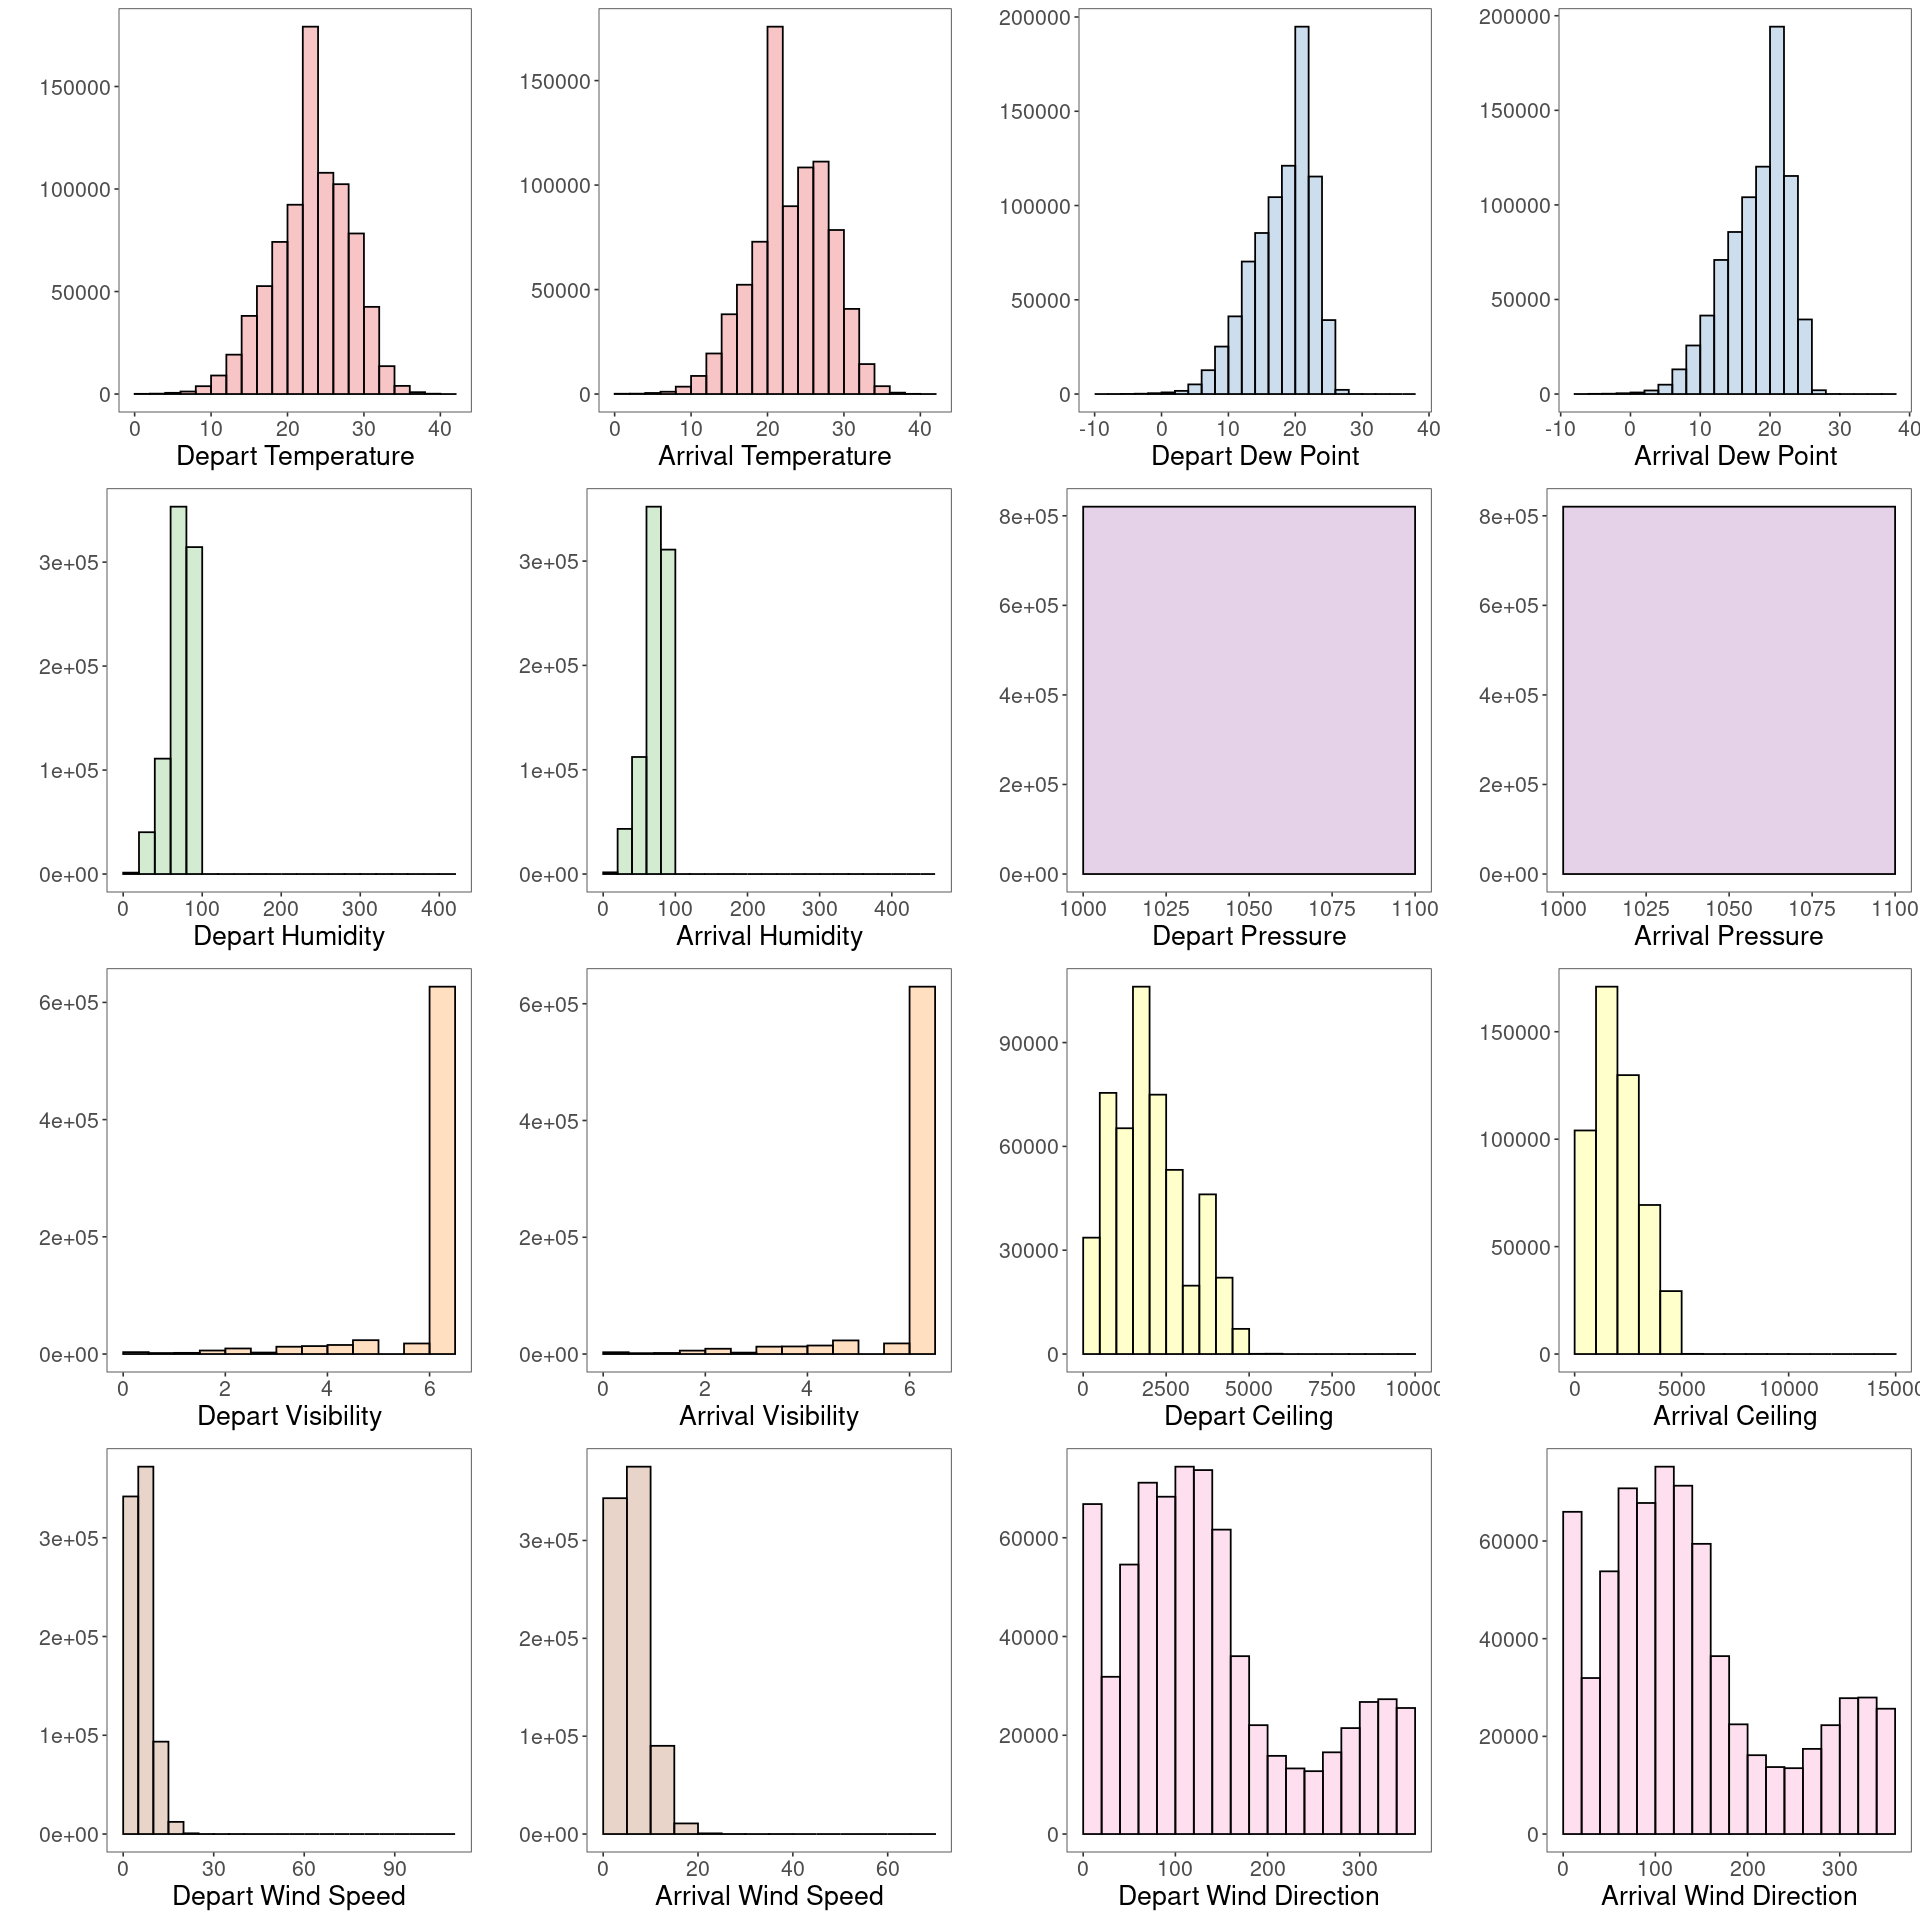

In [89]:
#Condições meteorológicas do aeroporto de partida

hist_dt <- plot_hist(data %>% select(depart_temperature), 
          label_x = "Depart Temperature", color=colors[1]) + font

hist_ddp <- plot_hist(data %>% select(depart_dew_point), 
          label_x = "Depart Dew Point", color=colors[2]) + font

hist_dh <- plot_hist(data %>% select(depart_humidity), 
          label_x = "Depart Humidity", color=colors[3]) + font

hist_dp <- plot_hist(data %>% select(depart_pressure), 
          label_x = "Depart Pressure", color=colors[4]) + font

hist_dv <- plot_hist(data %>% select(depart_visibility), 
          label_x = "Depart Visibility", color=colors[5]) + font

hist_dc <- plot_hist(data %>% select(depart_ceiling), 
          label_x = "Depart Ceiling", color=colors[6]) + font

hist_dws <- plot_hist(data %>% select(depart_wind_speed), 
          label_x = "Depart Wind Speed", color=colors[7]) + font

hist_dwd <- plot_hist(data %>% select(depart_wind_direction), 
          label_x = "Depart Wind Direction", color=colors[8]) + font

#Condições meteorológicas do aeroporto de chegada

hist_at <- plot_hist(data %>% select(arrival_temperature), 
          label_x = "Arrival Temperature", color=colors[1]) + font

hist_adp <- plot_hist(data %>% select(arrival_dew_point), 
          label_x = "Arrival Dew Point", color=colors[2]) + font

hist_ah <- plot_hist(data %>% select(arrival_humidity), 
          label_x = "Arrival Humidity", color=colors[3]) + font

hist_ap <- plot_hist(data %>% select(arrival_pressure), 
          label_x = "Arrival Pressure", color=colors[4]) + font

hist_av <- plot_hist(data %>% select(arrival_visibility), 
          label_x = "Arrival Visibility", color=colors[5]) + font

hist_ac <- plot_hist(data %>% select(arrival_ceiling), 
          label_x = "Arrival Ceiling", color=colors[6]) + font

hist_aws <- plot_hist(data %>% select(arrival_wind_speed), 
          label_x = "Arrival Wind Speed", color=colors[7]) + font

hist_awd <- plot_hist(data %>% select(arrival_wind_direction), 
          label_x = "Arrival Wind Direction", color=colors[8]) + font


 
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(hist_dt, hist_at, hist_ddp, hist_adp, hist_dh, hist_ah, hist_dp, hist_ap, hist_dv, hist_av, hist_dc, hist_ac, hist_dws, hist_aws, hist_dwd, hist_awd, ncol=4)

#### Distribuição de Densidade

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Warning message:
“Removed 85438 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 85677 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 316371 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 316749 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 100507 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 100755 rows containing non-finite values (`stat_density()`).”


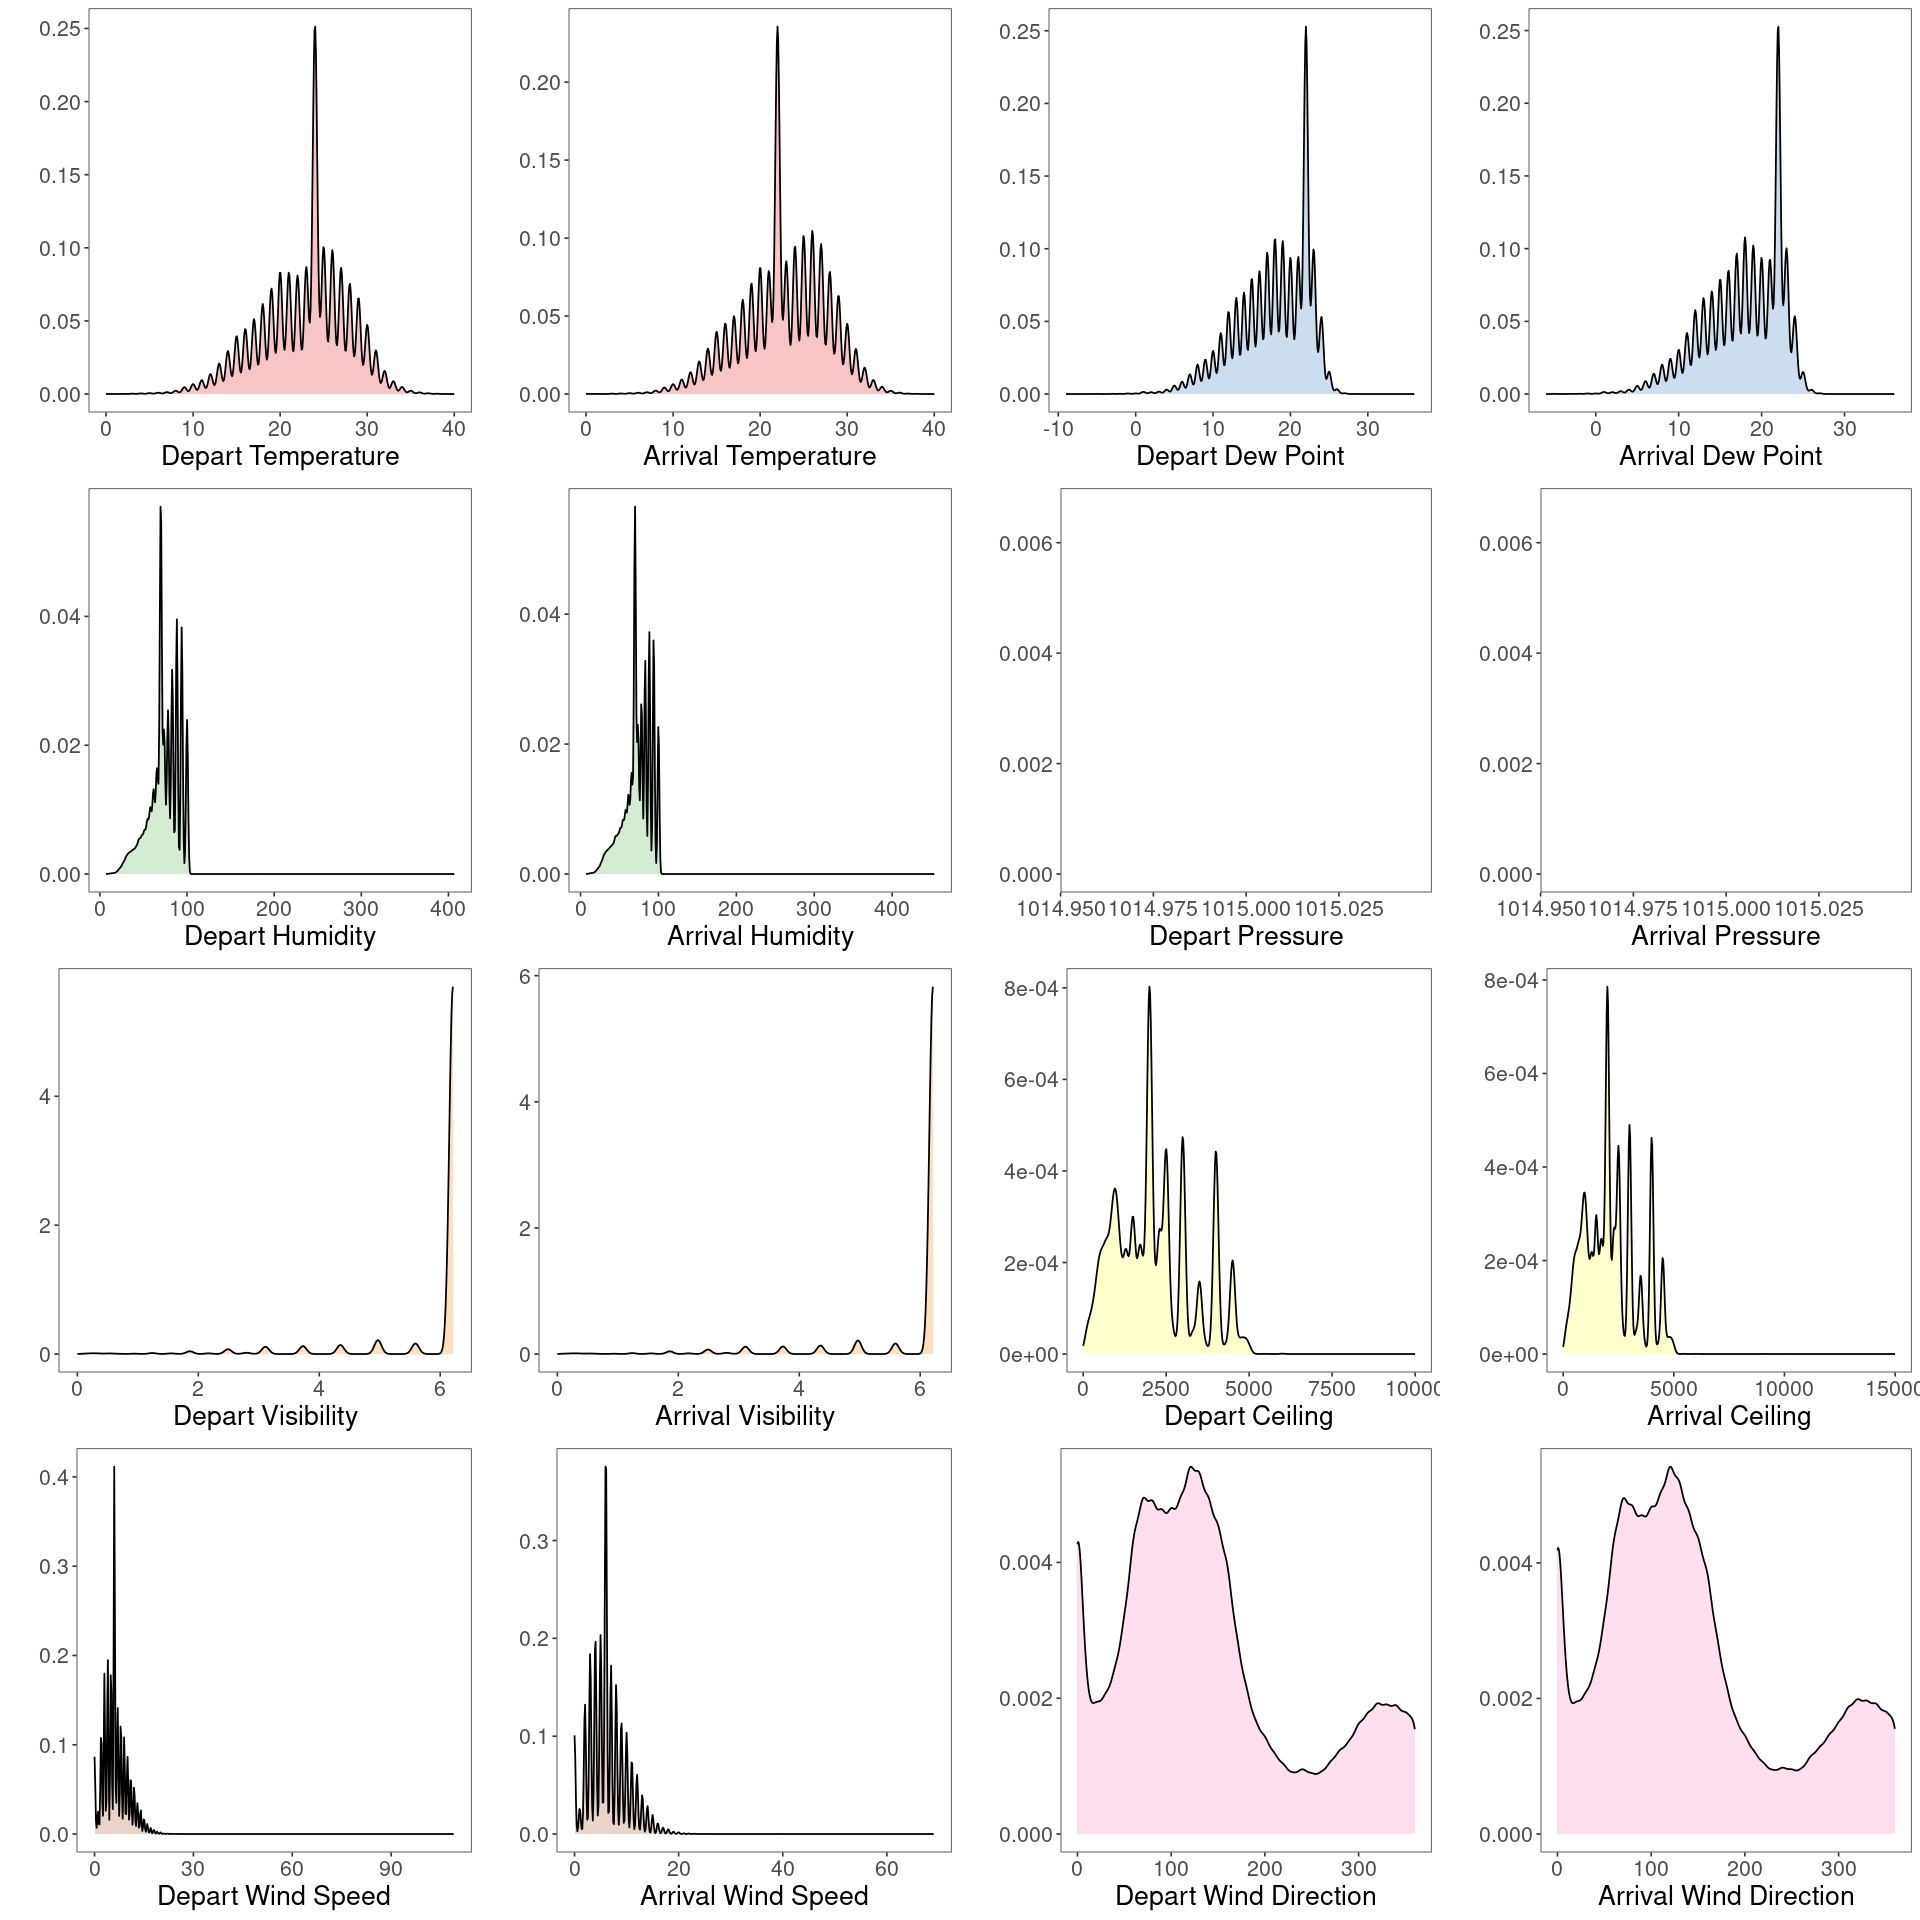

In [90]:
#Condições meteorológicas do aeroporto de partida

dens_dt <- plot_density(data %>% select(depart_temperature), 
          label_x = "Depart Temperature", color=colors[1]) + font

dens_ddp <- plot_density(data %>% select(depart_dew_point), 
          label_x = "Depart Dew Point", color=colors[2]) + font

dens_dh <- plot_density(data %>% select(depart_humidity), 
          label_x = "Depart Humidity", color=colors[3]) + font

dens_dp <- plot_density(data %>% select(depart_pressure), 
          label_x = "Depart Pressure", color=colors[4]) + font

dens_dv <- plot_density(data %>% select(depart_visibility), 
          label_x = "Depart Visibility", color=colors[5]) + font

dens_dc <- plot_density(data %>% select(depart_ceiling), 
          label_x = "Depart Ceiling", color=colors[6]) + font

dens_dws <- plot_density(data %>% select(depart_wind_speed), 
          label_x = "Depart Wind Speed", color=colors[7]) + font

dens_dwd <- plot_density(data %>% select(depart_wind_direction), 
          label_x = "Depart Wind Direction", color=colors[8]) + font

#Condições meteorológicas do aeroporto de chegada

dens_at <- plot_density(data %>% select(arrival_temperature), 
          label_x = "Arrival Temperature", color=colors[1]) + font

dens_adp <- plot_density(data %>% select(arrival_dew_point), 
          label_x = "Arrival Dew Point", color=colors[2]) + font

dens_ah <- plot_density(data %>% select(arrival_humidity), 
          label_x = "Arrival Humidity", color=colors[3]) + font

dens_ap <- plot_density(data %>% select(arrival_pressure), 
          label_x = "Arrival Pressure", color=colors[4]) + font

dens_av <- plot_density(data %>% select(arrival_visibility), 
          label_x = "Arrival Visibility", color=colors[5]) + font

dens_ac <- plot_density(data %>% select(arrival_ceiling), 
          label_x = "Arrival Ceiling", color=colors[6]) + font

dens_aws <- plot_density(data %>% select(arrival_wind_speed), 
          label_x = "Arrival Wind Speed", color=colors[7]) + font

dens_awd <- plot_density(data %>% select(arrival_wind_direction), 
          label_x = "Arrival Wind Direction", color=colors[8]) + font


 
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(dens_dt, dens_at, dens_ddp, dens_adp, dens_dh, dens_ah, dens_dp, dens_ap, dens_dv, dens_av, dens_dc, dens_ac, dens_dws, dens_aws, dens_dwd, dens_awd, ncol=4)

#### Box-plot

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Using  as id variables

Warning message:
“Removed 85438 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 85677 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 316371 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 316749 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 100507 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 100755 rows containing non-finite values (`stat_boxplot()`).”


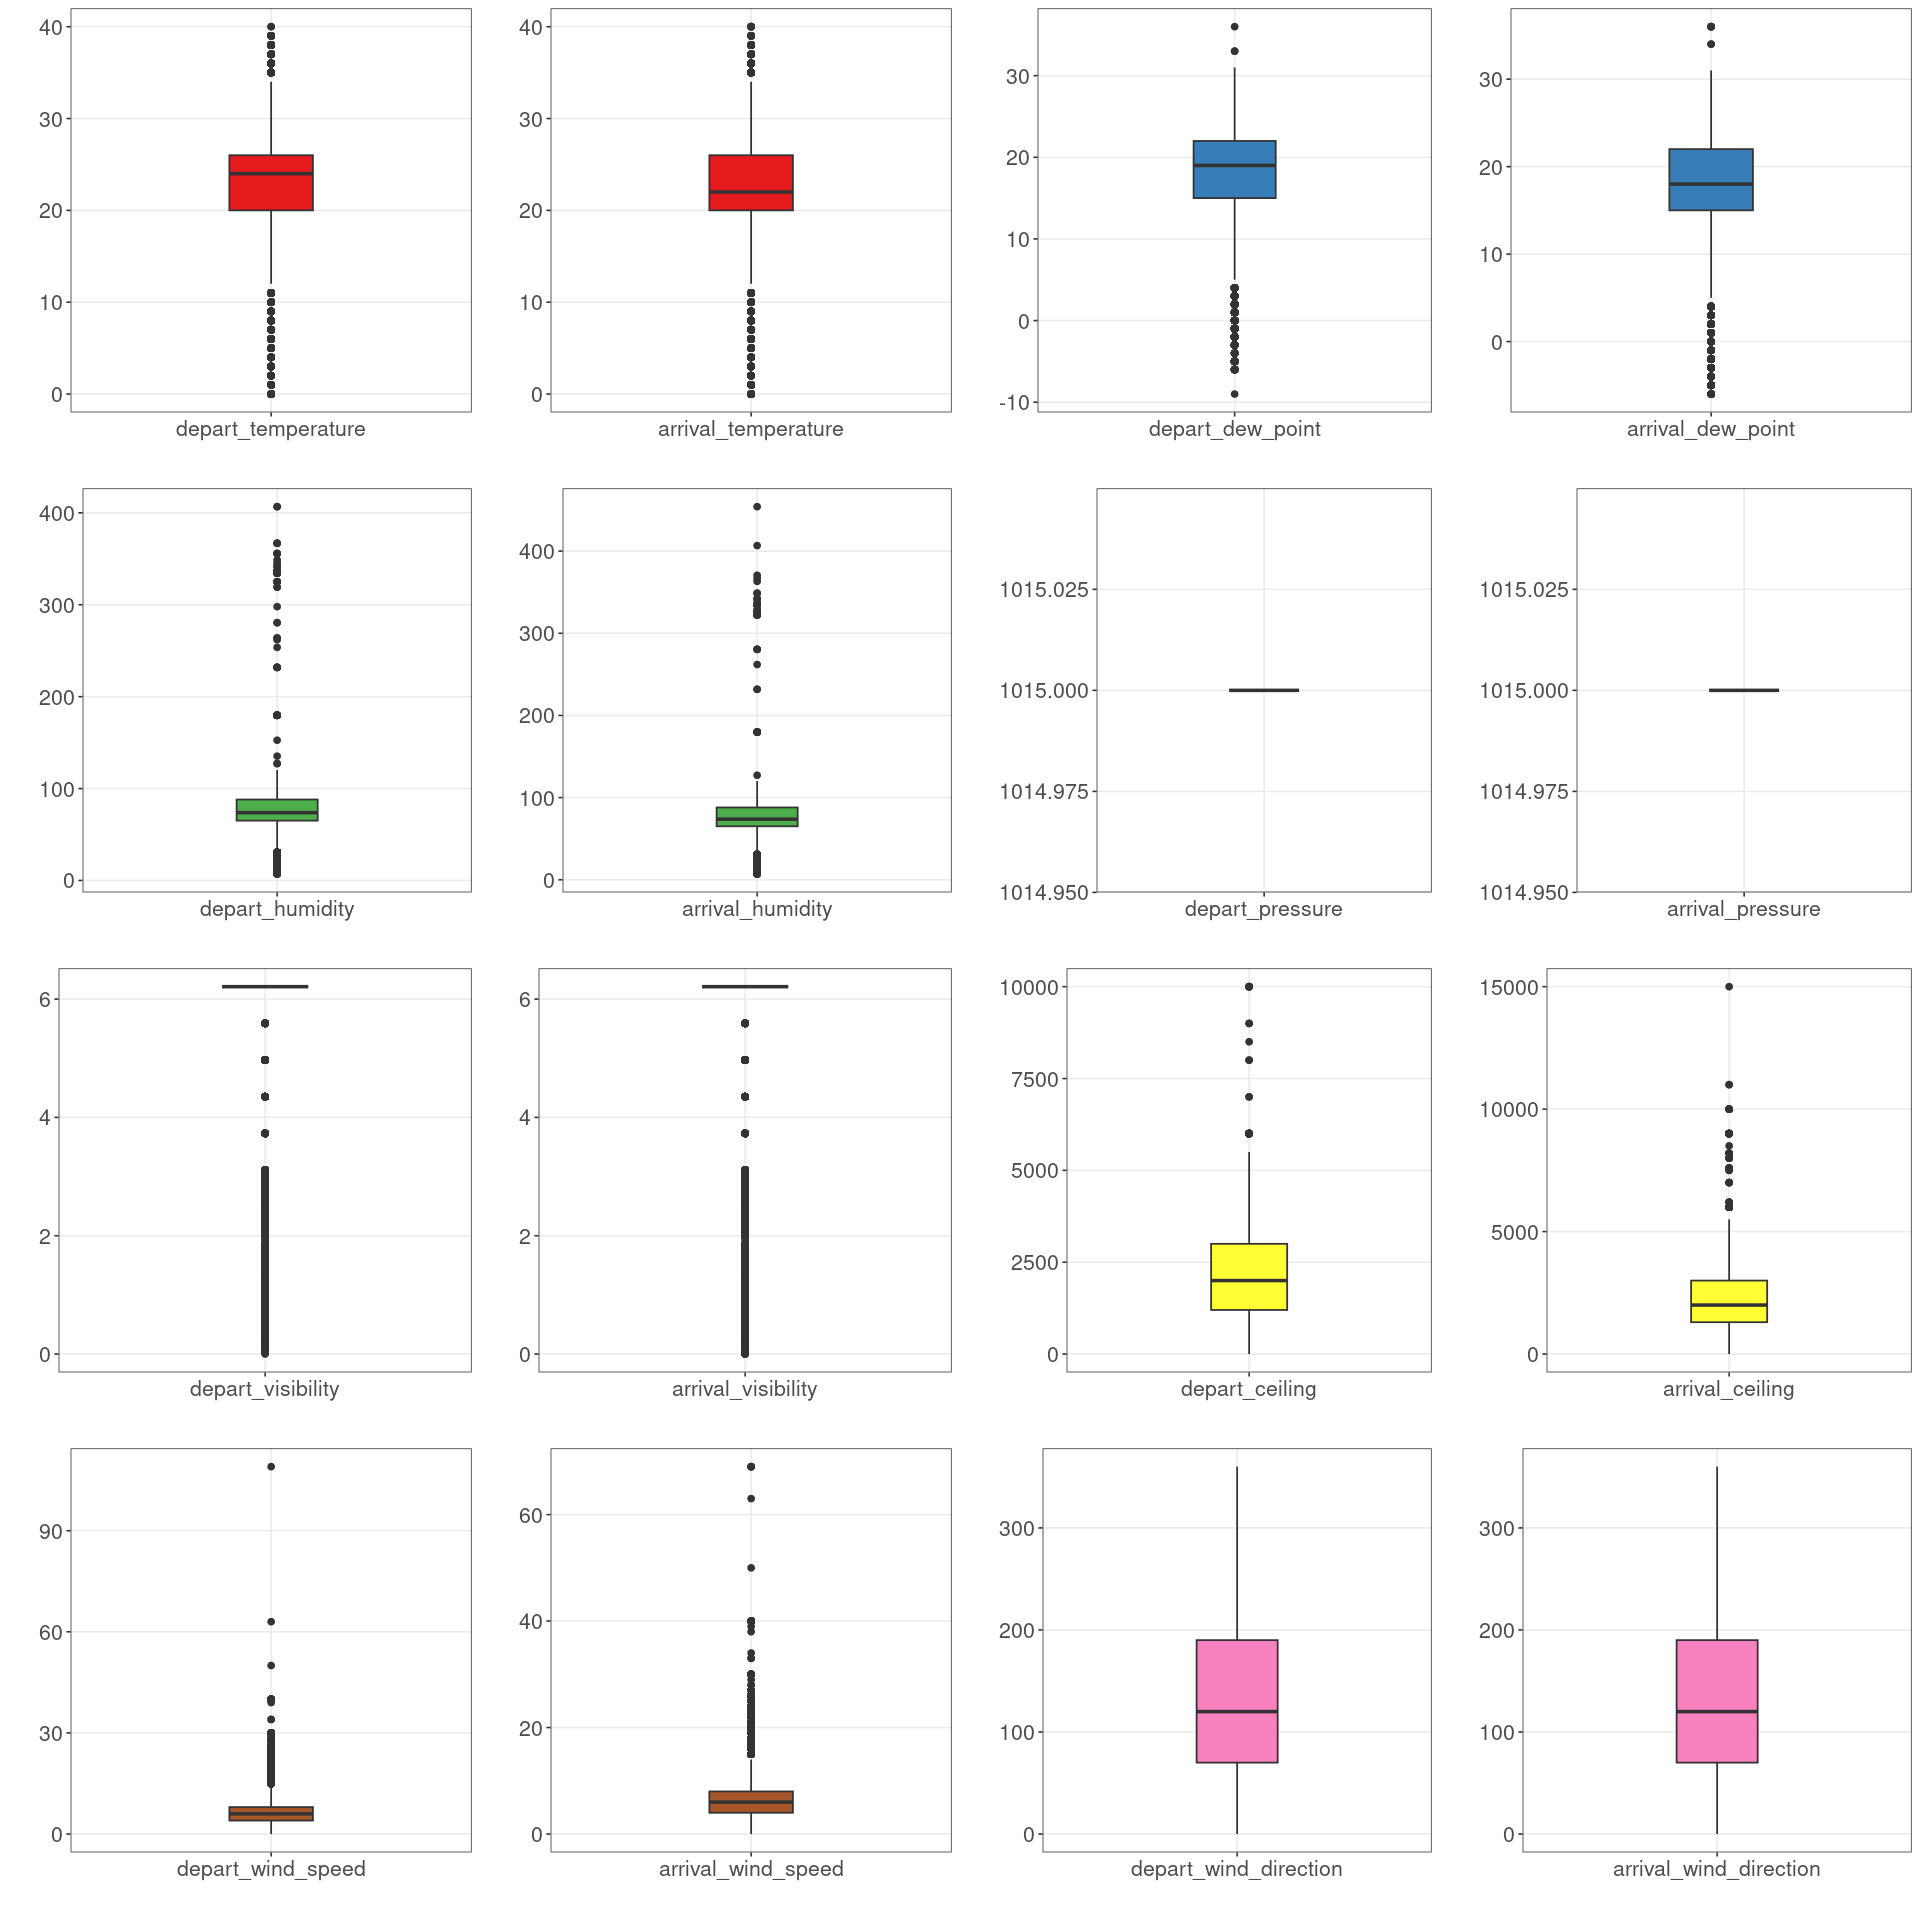

In [92]:
#Condições meteorológicas do aeroporto de partida

box_dt <- plot_boxplot(data %>% select(depart_temperature), color=colors[1]) + font

box_ddp <- plot_boxplot(data %>% select(depart_dew_point), color=colors[2]) + font

box_dh <- plot_boxplot(data %>% select(depart_humidity), color=colors[3]) + font

box_dp <- plot_boxplot(data %>% select(depart_pressure), color=colors[4]) + font

box_dv <- plot_boxplot(data %>% select(depart_visibility), color=colors[5]) + font

box_dc <- plot_boxplot(data %>% select(depart_ceiling), color=colors[6]) + font

box_dws <- plot_boxplot(data %>% select(depart_wind_speed), color=colors[7]) + font

box_dwd <- plot_boxplot(data %>% select(depart_wind_direction), color=colors[8]) + font

#Condições meteorológicas do aeroporto de chegada

box_at <- plot_boxplot(data %>% select(arrival_temperature), color=colors[1]) + font

box_adp <- plot_boxplot(data %>% select(arrival_dew_point), color=colors[2]) + font

box_ah <- plot_boxplot(data %>% select(arrival_humidity), color=colors[3]) + font

box_ap <- plot_boxplot(data %>% select(arrival_pressure), color=colors[4]) + font

box_av <- plot_boxplot(data %>% select(arrival_visibility), color=colors[5]) + font

box_ac <- plot_boxplot(data %>% select(arrival_ceiling), color=colors[6]) + font

box_aws <- plot_boxplot(data %>% select(arrival_wind_speed), color=colors[7]) + font

box_awd <- plot_boxplot(data %>% select(arrival_wind_direction), color=colors[8]) + font


 
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(box_dt, box_at, box_ddp, box_adp, box_dh, box_ah, box_dp, box_ap, box_dv, box_av, box_dc, box_ac, box_dws, box_aws, box_dwd, box_awd, ncol=4)

#### Distribuição de densidade simbolizada pelo atributo classificador

In [77]:
colors <- brewer.pal(8, 'Set1')
font <- theme(text = element_text(size=16))

Warning message:
“Removed 85438 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 85677 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 316371 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 316749 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 100507 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 100755 rows containing non-finite values (`stat_density()`).”


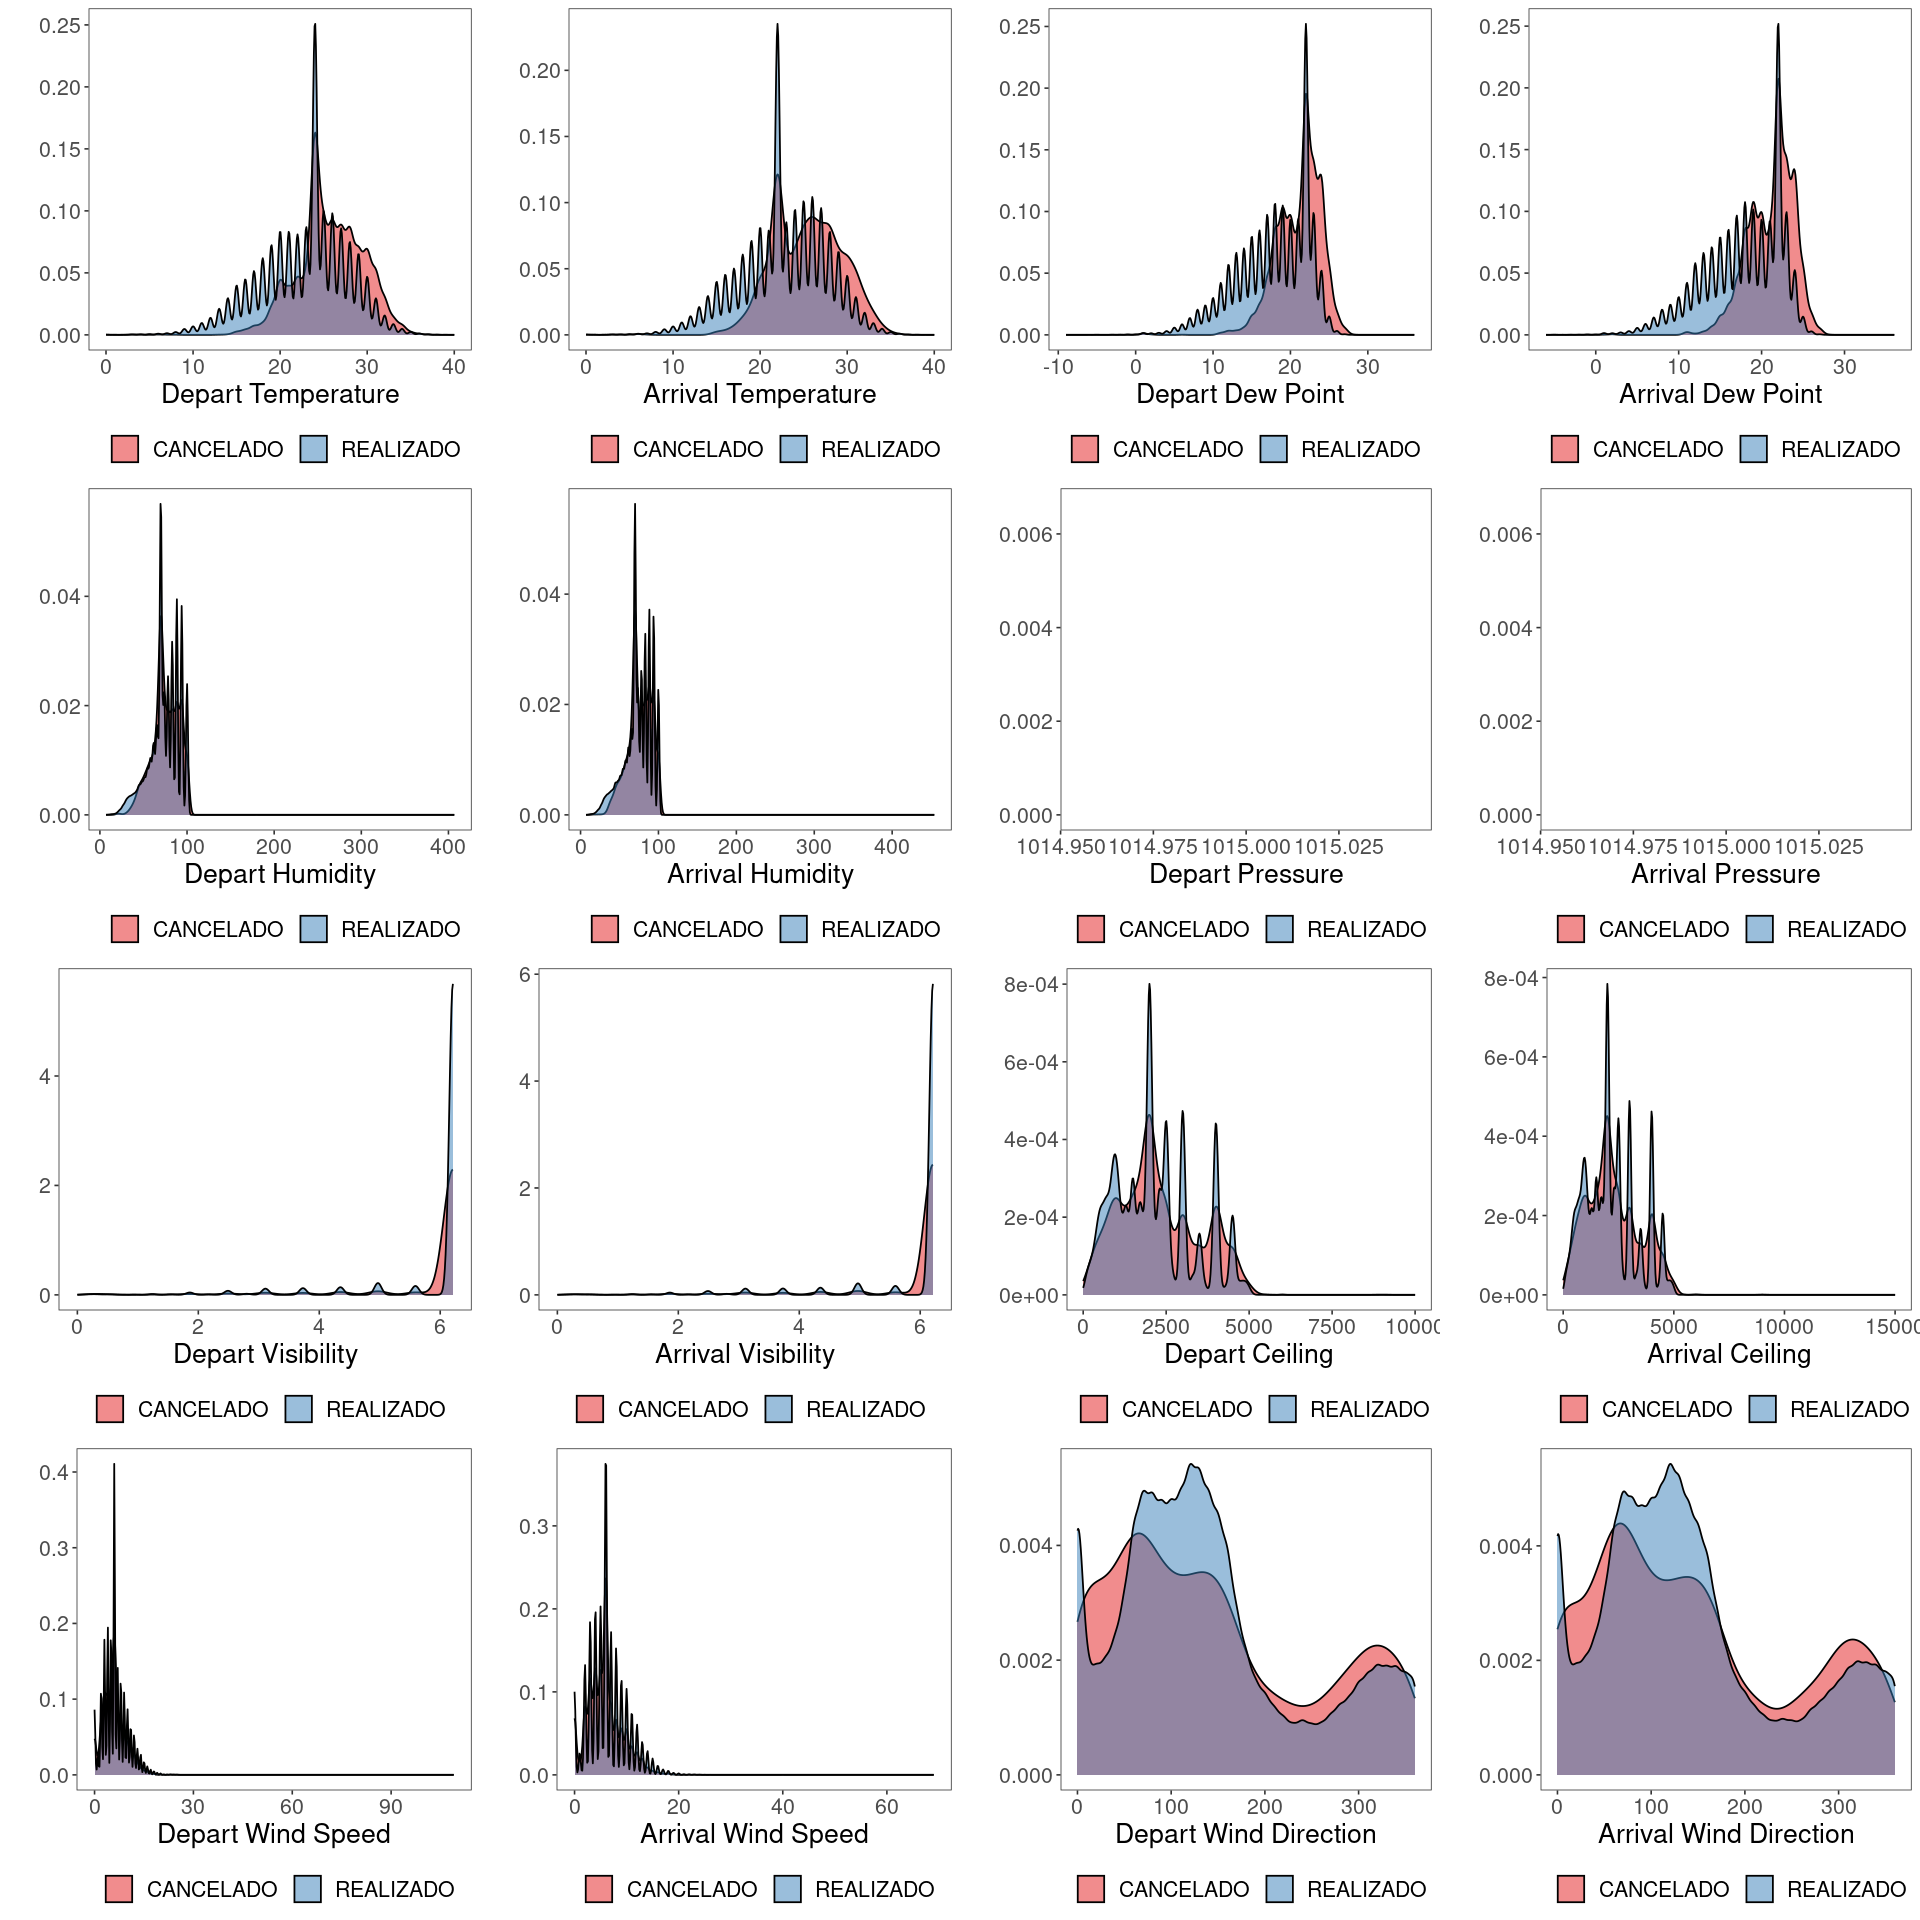

In [94]:
#Condições meteorológicas do aeroporto de partida

densclass_dt <- plot_density_class(data %>% select(situation_type, depart_temperature), 
          class_label="situation_type", label_x = "Depart Temperature", color=colors[c(1:2)]) + font

densclass_ddp <- plot_density_class(data %>% select(situation_type, depart_dew_point), 
          class_label="situation_type", label_x = "Depart Dew Point", color=colors[c(1:2)]) + font

densclass_dh <- plot_density_class(data %>% select(situation_type, depart_humidity), 
          class_label="situation_type", label_x = "Depart Humidity", color=colors[c(1:2)]) + font

densclass_dp <- plot_density_class(data %>% select(situation_type, depart_pressure), 
          class_label="situation_type", label_x = "Depart Pressure", color=colors[c(1:2)]) + font

densclass_dv <- plot_density_class(data %>% select(situation_type, depart_visibility), 
          class_label="situation_type", label_x = "Depart Visibility", color=colors[c(1:2)]) + font

densclass_dc <- plot_density_class(data %>% select(situation_type, depart_ceiling), 
          class_label="situation_type", label_x = "Depart Ceiling", color=colors[c(1:2)]) + font

densclass_dws <- plot_density_class(data %>% select(situation_type, depart_wind_speed), 
          class_label="situation_type", label_x = "Depart Wind Speed", color=colors[c(1:2)]) + font

densclass_dwd <- plot_density_class(data %>% select(situation_type, depart_wind_direction), 
          class_label="situation_type", label_x = "Depart Wind Direction", color=colors[c(1:2)]) + font

#Condições meteorológicas do aeroporto de chegada

densclass_at <- plot_density_class(data %>% select(situation_type, arrival_temperature), 
          class_label="situation_type", label_x = "Arrival Temperature", color=colors[c(1:2)]) + font

densclass_adp <- plot_density_class(data %>% select(situation_type, arrival_dew_point), 
          class_label="situation_type", label_x = "Arrival Dew Point", color=colors[c(1:2)]) + font

densclass_ah <- plot_density_class(data %>% select(situation_type, arrival_humidity), 
          class_label="situation_type", label_x = "Arrival Humidity", color=colors[c(1:2)]) + font

densclass_ap <- plot_density_class(data %>% select(situation_type, arrival_pressure), 
          class_label="situation_type", label_x = "Arrival Pressure", color=colors[c(1:2)]) + font

densclass_av <- plot_density_class(data %>% select(situation_type, arrival_visibility), 
          class_label="situation_type", label_x = "Arrival Visibility", color=colors[c(1:2)]) + font

densclass_ac <- plot_density_class(data %>% select(situation_type, arrival_ceiling), 
          class_label="situation_type", label_x = "Arrival Ceiling", color=colors[c(1:2)]) + font

densclass_aws <- plot_density_class(data %>% select(situation_type, arrival_wind_speed), 
          class_label="situation_type", label_x = "Arrival Wind Speed", color=colors[c(1:2)]) + font

densclass_awd <- plot_density_class(data %>% select(situation_type, arrival_wind_direction), 
          class_label="situation_type", label_x = "Arrival Wind Direction", color=colors[c(1:2)]) + font


 
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(densclass_dt, densclass_at, densclass_ddp, densclass_adp, densclass_dh, densclass_ah, densclass_dp, densclass_ap, densclass_dv, densclass_av, densclass_dc, densclass_ac, densclass_dws, densclass_aws, densclass_dwd, densclass_awd, ncol=4)

#### Box-plot simbolizado pelo atributo classificador

Warning message:
“Removed 85438 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 85677 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 316371 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 316749 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 100507 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 100755 rows containing non-finite values (`stat_boxplot()`).”


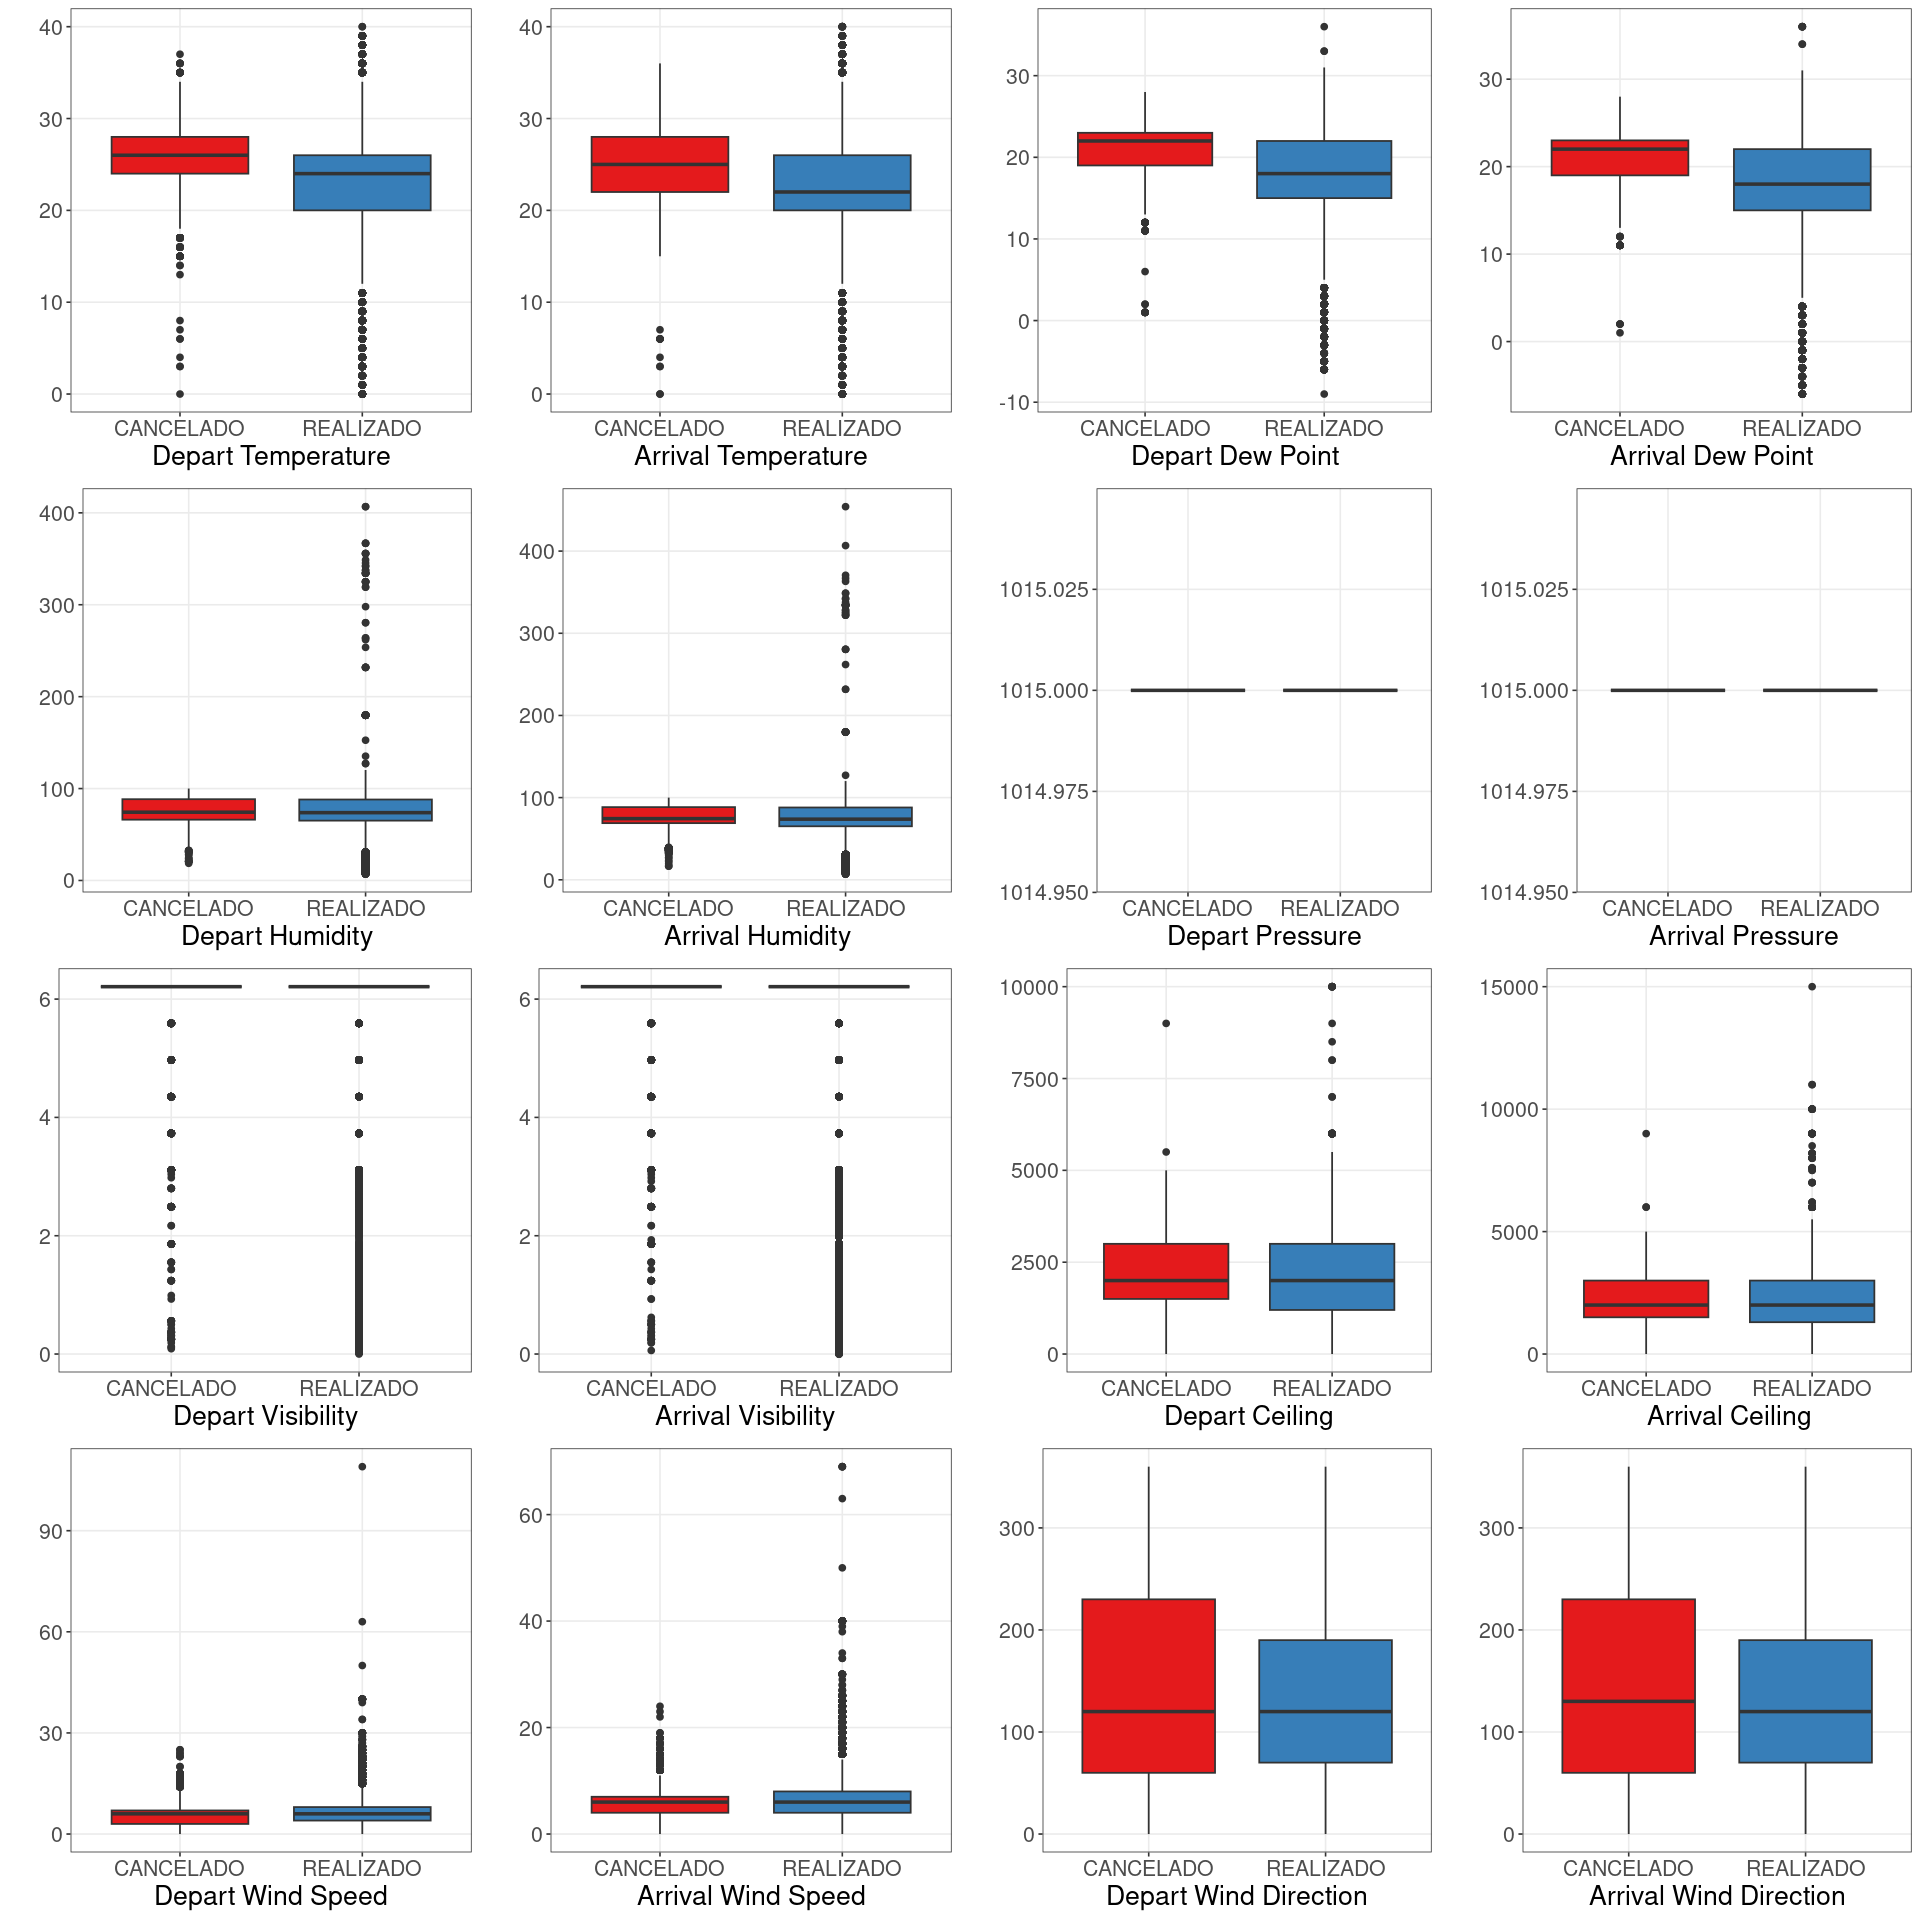

In [95]:
#Condições meteorológicas do aeroporto de partida

boxclass_dt <- plot_boxplot_class(data %>% select(situation_type, depart_temperature), 
          class_label="situation_type", label_x = "Depart Temperature", color=colors[c(1:2)]) + font

boxclass_ddp <- plot_boxplot_class(data %>% select(situation_type, depart_dew_point), 
          class_label="situation_type", label_x = "Depart Dew Point", color=colors[c(1:2)]) + font

boxclass_dh <- plot_boxplot_class(data %>% select(situation_type, depart_humidity), 
          class_label="situation_type", label_x = "Depart Humidity", color=colors[c(1:2)]) + font

boxclass_dp <- plot_boxplot_class(data %>% select(situation_type, depart_pressure), 
          class_label="situation_type", label_x = "Depart Pressure", color=colors[c(1:2)]) + font

boxclass_dv <- plot_boxplot_class(data %>% select(situation_type, depart_visibility), 
          class_label="situation_type", label_x = "Depart Visibility", color=colors[c(1:2)]) + font

boxclass_dc <- plot_boxplot_class(data %>% select(situation_type, depart_ceiling), 
          class_label="situation_type", label_x = "Depart Ceiling", color=colors[c(1:2)]) + font

boxclass_dws <- plot_boxplot_class(data %>% select(situation_type, depart_wind_speed), 
          class_label="situation_type", label_x = "Depart Wind Speed", color=colors[c(1:2)]) + font

boxclass_dwd <- plot_boxplot_class(data %>% select(situation_type, depart_wind_direction), 
          class_label="situation_type", label_x = "Depart Wind Direction", color=colors[c(1:2)]) + font

#Condições meteorológicas do aeroporto de chegada

boxclass_at <- plot_boxplot_class(data %>% select(situation_type, arrival_temperature), 
          class_label="situation_type", label_x = "Arrival Temperature", color=colors[c(1:2)]) + font

boxclass_adp <- plot_boxplot_class(data %>% select(situation_type, arrival_dew_point), 
          class_label="situation_type", label_x = "Arrival Dew Point", color=colors[c(1:2)]) + font

boxclass_ah <- plot_boxplot_class(data %>% select(situation_type, arrival_humidity), 
          class_label="situation_type", label_x = "Arrival Humidity", color=colors[c(1:2)]) + font

boxclass_ap <- plot_boxplot_class(data %>% select(situation_type, arrival_pressure), 
          class_label="situation_type", label_x = "Arrival Pressure", color=colors[c(1:2)]) + font

boxclass_av <- plot_boxplot_class(data %>% select(situation_type, arrival_visibility), 
          class_label="situation_type", label_x = "Arrival Visibility", color=colors[c(1:2)]) + font

boxclass_ac <- plot_boxplot_class(data %>% select(situation_type, arrival_ceiling), 
          class_label="situation_type", label_x = "Arrival Ceiling", color=colors[c(1:2)]) + font

boxclass_aws <- plot_boxplot_class(data %>% select(situation_type, arrival_wind_speed), 
          class_label="situation_type", label_x = "Arrival Wind Speed", color=colors[c(1:2)]) + font

boxclass_awd <- plot_boxplot_class(data %>% select(situation_type, arrival_wind_direction), 
          class_label="situation_type", label_x = "Arrival Wind Direction", color=colors[c(1:2)]) + font


 
options(repr.plot.width=16, repr.plot.height=16)
grid.arrange(boxclass_dt, boxclass_at, boxclass_ddp, boxclass_adp, boxclass_dh, boxclass_ah, boxclass_dp, boxclass_ap, boxclass_dv, boxclass_av, boxclass_dc, boxclass_ac, boxclass_dws, boxclass_aws, boxclass_dwd, boxclass_awd, ncol=4)